##Installing and importing packages

In [2]:
!pip install lightkurve #install and import packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 259 kB 5.2 MB/s 
     |████████████████████████████████| 11.4 MB 55.8 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 4.5 MB 51.2 MB/s 
     |████████████████████████████████| 41 kB 190 kB/s 
     |████████████████████████████████| 885 kB 54.5 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 49.9 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=ad84cb2a7ecdf1d3f0935f1d2d2235a4169f70f8d77a50973ecfa3cb7a7ce0ac
  Stored in directory: /root/.cache/pip/wheels/b4/3b/77/a06a07a415b222f47a7e522333f85ce64c0defd07a57762267
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=26ac28061902e65127d333c605833de189a823d6b010c64adf44d6da1b6274b8
  Stored in directory: /root/.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import lightkurve as lk
from lightkurve.correctors import CBVCorrector #used to remove noise
import matplotlib.pyplot as plt  #used for plotting
import numpy as np
from scipy.constants import pi,G

## Analysing,preprocessing and visualizing fits file

In [5]:
def flux_curve(name): #function for plotting lightcurve 
  light_curve=lk.read(f'/content/drive/MyDrive/{name}.fits') #reading fits file

  light_curve.info()   #getting light curve information
  #light_curve.remove_outliers(sigma=0.05, return_mask=False)
  
  light_curve.plot()   #plotting light curve
  
  light_curve.remove_outliers() #preprocessing
  light_curve.remove_nans()

  flat_lc=light_curve.flatten(window_length=501) #Removes the low frequency trend using scipy’s Savitzky-Golay filter
  
  flat_lc.plot()
  
  cbvCorrector = CBVCorrector(light_curve)
  flat_lc.normalize().plot()                      #Returns a normalized version of the light curve.

#The normalized light curve is obtained by dividing the flux and flux_err object attributes by the median flux. 
  

## Finding time period for the exoplanet
Using Box Least Square Periodogram method

In [75]:
def timeperiod(name):# Create array of periods to search
    flat_lc=lk.read(f'/content/drive/MyDrive/{name}.fits').flatten(window_length=501)
    flat_lc.remove_outliers() #preprocessing
    flat_lc.remove_nans()
    time_period = np.linspace(1, 100, 10000)
    # Create a BLSPeriodogram
    bls = flat_lc.to_periodogram(method='bls', period=time_period, frequency_factor=50); #Box-fitting Least Squares method
    bls.plot()
    exoplanet_period = bls.period_at_max_power
    print(f"time period for exoplanet of {name} star is",exoplanet_period)

<KeplerLightCurve length=4492>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     6
       flux_err float32 electron / s {:14.7e} MaskedQuantity     6
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     4
   centroid_row float64          pix {:10.5f} MaskedQuantity     4
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     4
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     4
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     4
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     4
    pdcsap_flux float32 electro

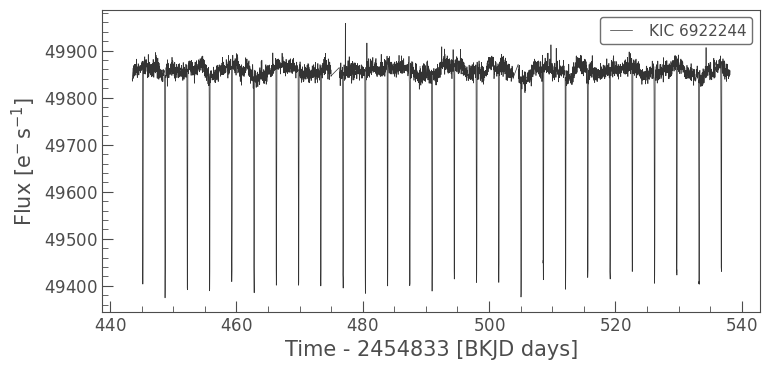

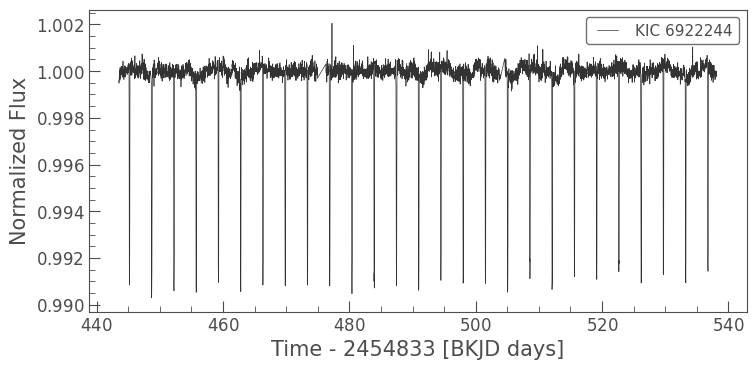

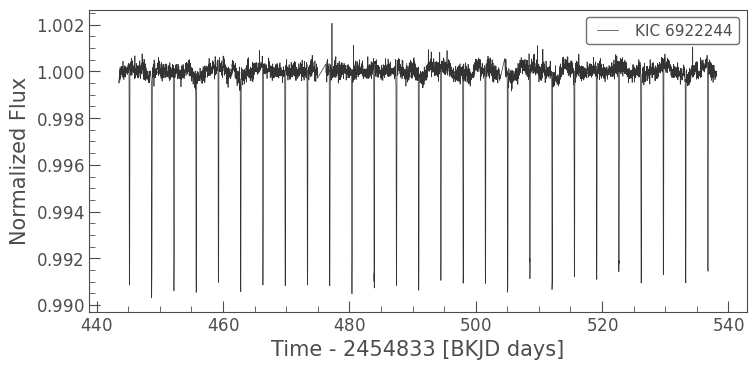

In [6]:
flux_curve('Ankur')

time period for exoplanet of Ankur star is 3.524752475247525 d


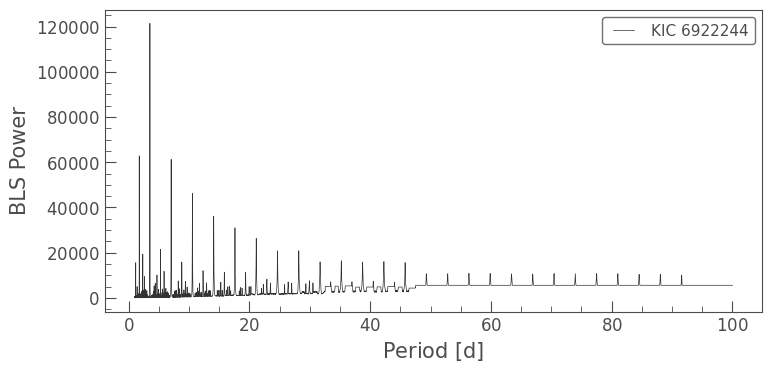

In [76]:
# Check the value for period
timeperiod('Ankur')

<ipython-input-9-6d8a1c4959c0>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  flat_lc.fold(period=3.52).bin(binsize=10).plot()#checking if the value is correct by folding


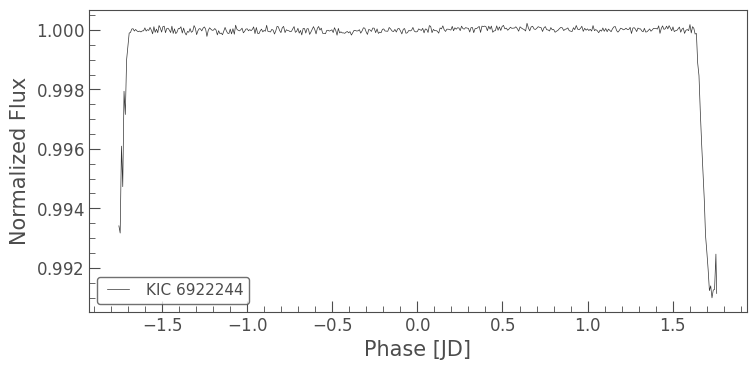

In [9]:
flat_lc.fold(period=3.52).bin(binsize=10).plot()#checking if the value is correct by folding

<KeplerLightCurve length=4492>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     6
       flux_err float32 electron / s {:14.7e} MaskedQuantity     6
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     5
   centroid_row float64          pix {:10.5f} MaskedQuantity     5
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     5
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     5
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     5
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     5
    pdcsap_flux float32 electro

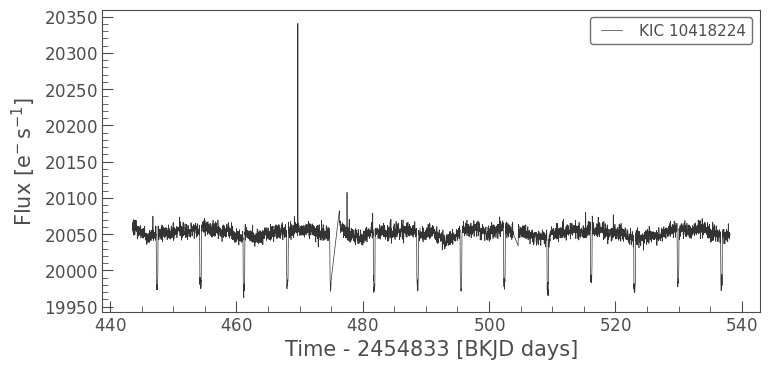

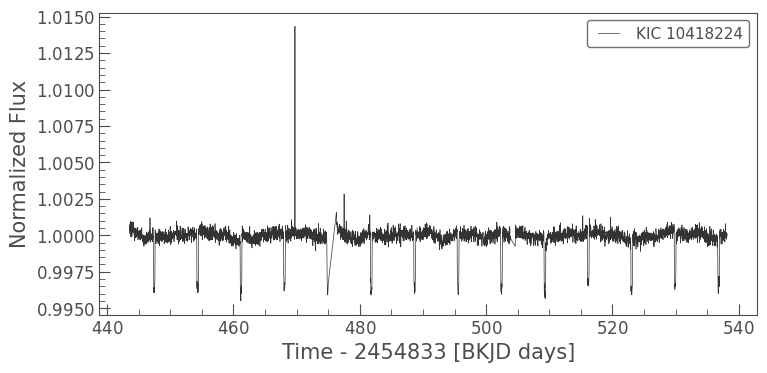

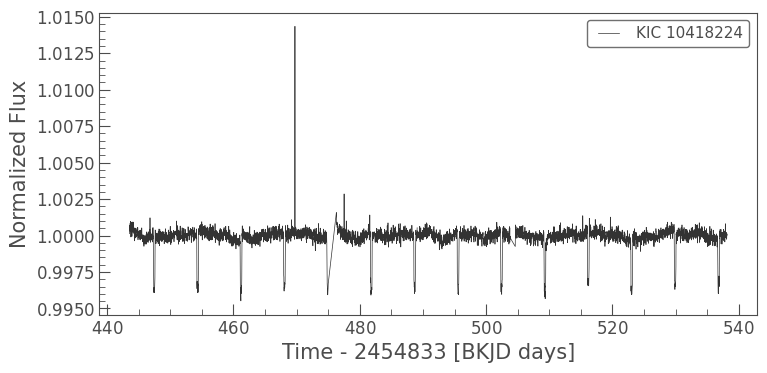

In [10]:
flux_curve('Arush')

In [11]:
#flat_lc.errorbar()

In [12]:
# import astropy.constants as const
#flat_lc.flux=const.flat_lc.flux.value
# mask=((flat_lc.time) > 470) 
# mask_lc=flat_lc[mask]
# mask_lc.scatter

time period for exoplanet of Arush star is 6.871287128712871 d


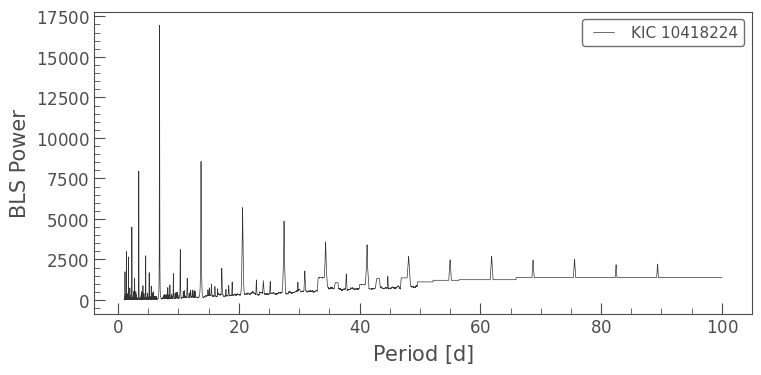

In [77]:
timeperiod("Arush")

In [14]:
#bls.flatten()
#bls.smooth()


<Quantity 6.87348735 d>

<ipython-input-15-784ac32124f6>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  flat_lc.fold(period=6.87).bin(binsize=50).plot()#checking


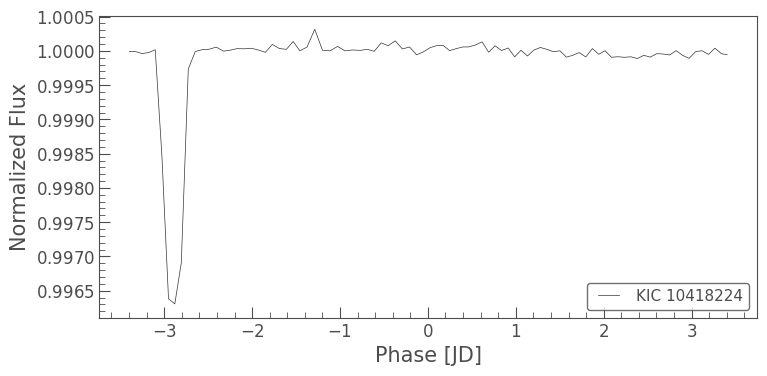

In [15]:
flat_lc.fold(period=6.87).bin(binsize=50).plot()#checking

<KeplerLightCurve length=4492>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     6
       flux_err float32 electron / s {:14.7e} MaskedQuantity     6
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     4
   centroid_row float64          pix {:10.5f} MaskedQuantity     4
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     4
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     4
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     4
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     4
    pdcsap_flux float32 electro

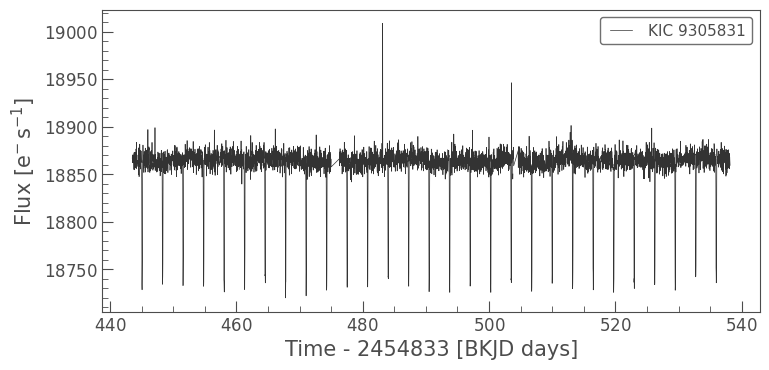

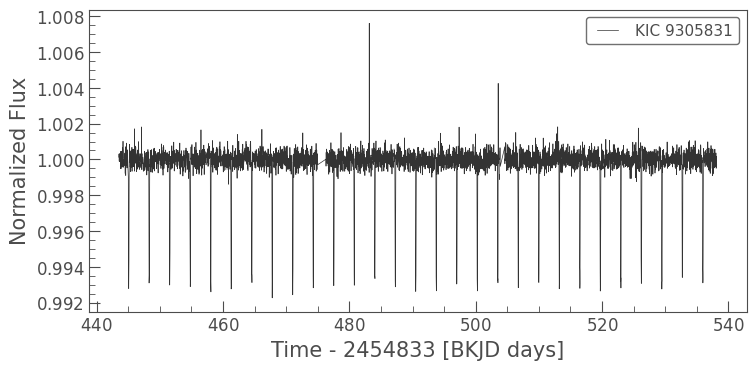

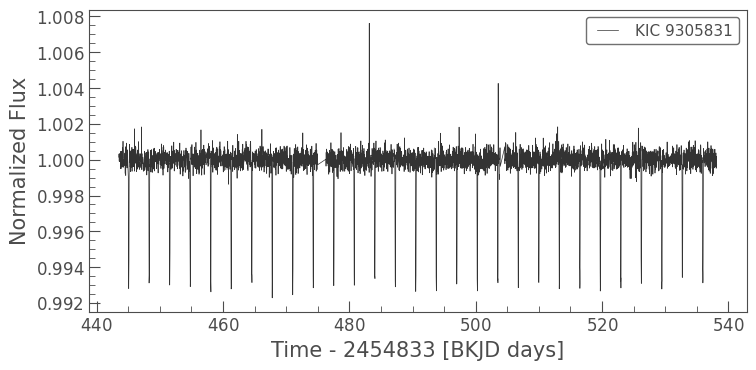

In [53]:
flux_curve('Rachna')

time period for exoplanet of Rachna star is 3.2475247524752477 d


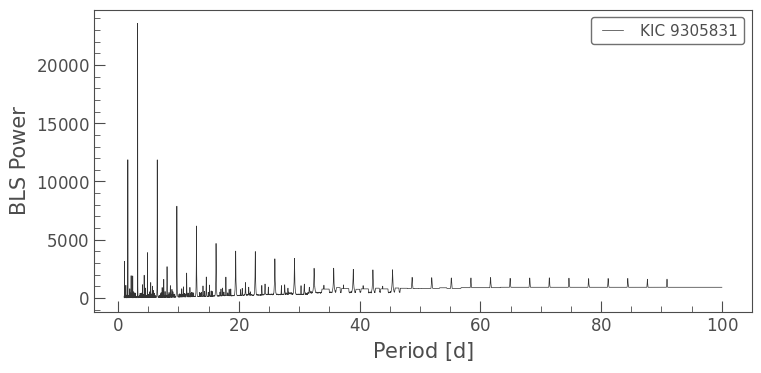

In [78]:
timeperiod('Rachna')

<KeplerLightCurve length=4492>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     6
       flux_err float32 electron / s {:14.7e} MaskedQuantity     6
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     5
   centroid_row float64          pix {:10.5f} MaskedQuantity     5
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     5
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     5
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     5
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     5
    pdcsap_flux float32 electro

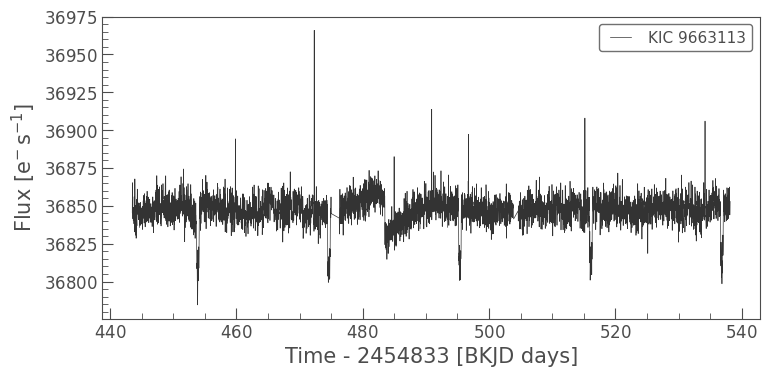

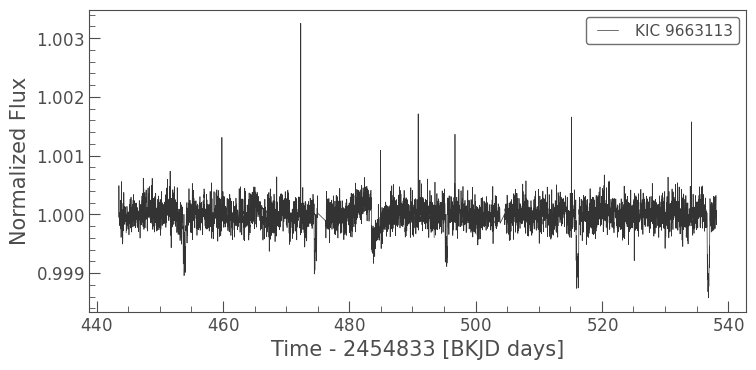

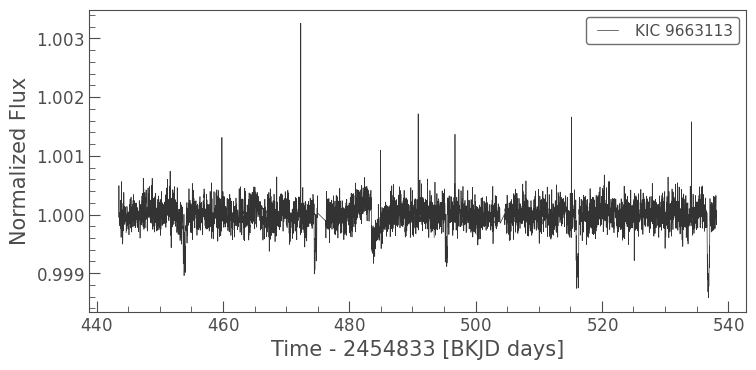

In [19]:
flux_curve('Kushagra')


time period for exoplanet of Kushagra star is 20.752475247524753 d


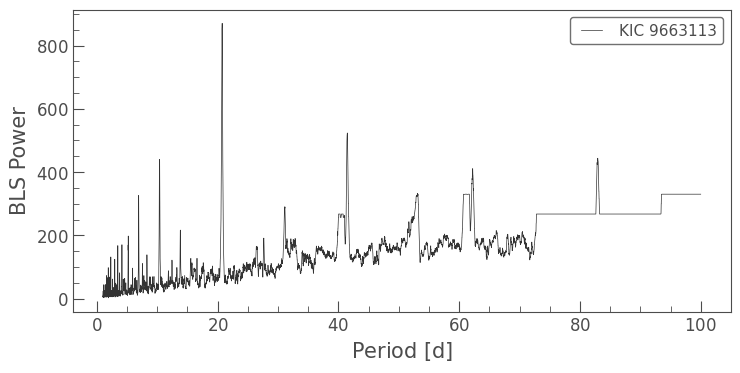

In [79]:
timeperiod('Kushagra')

<KeplerLightCurve length=4492>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     6
       flux_err float32 electron / s {:14.7e} MaskedQuantity     6
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     5
   centroid_row float64          pix {:10.5f} MaskedQuantity     5
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     5
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     5
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     5
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     5
    pdcsap_flux float32 electro

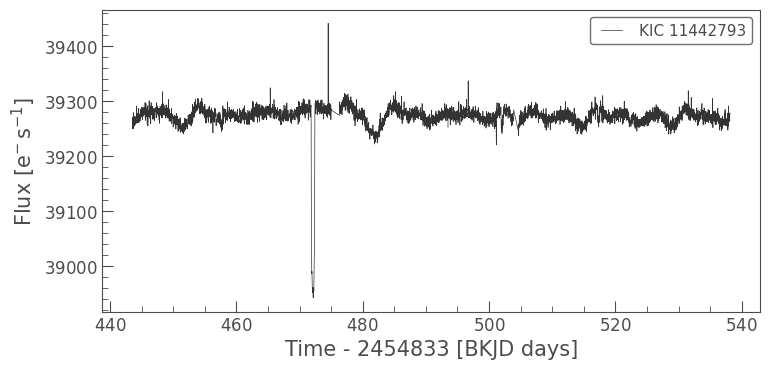

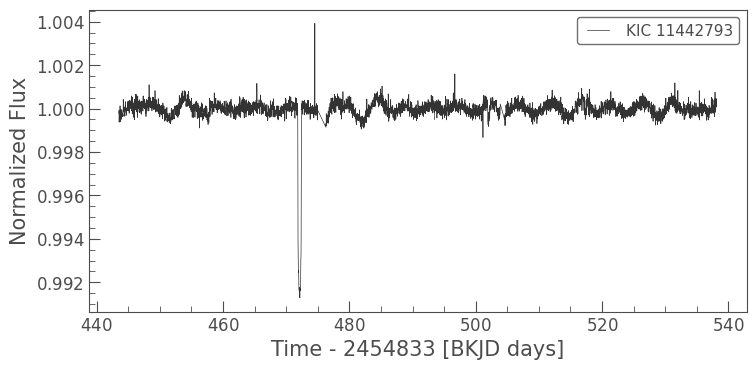

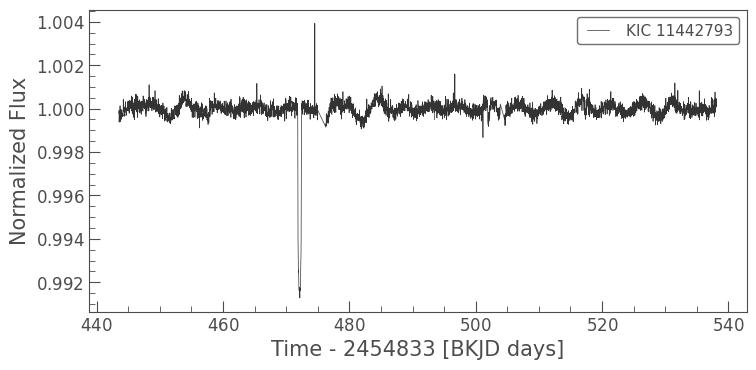

In [65]:
flux_curve('Rishi_1')

<KeplerLightCurve length=4276>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity     4
       flux_err float32 electron / s {:14.7e} MaskedQuantity     4
        quality   int32                {:16b}         Column     0
       timecorr float32            d {:13.6e}       Quantity     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     2
   centroid_row float64          pix {:10.5f} MaskedQuantity     2
      cadenceno   int32                {:10d}         Column     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     2
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     2
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     2
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     2
    pdcsap_flux float32 electro

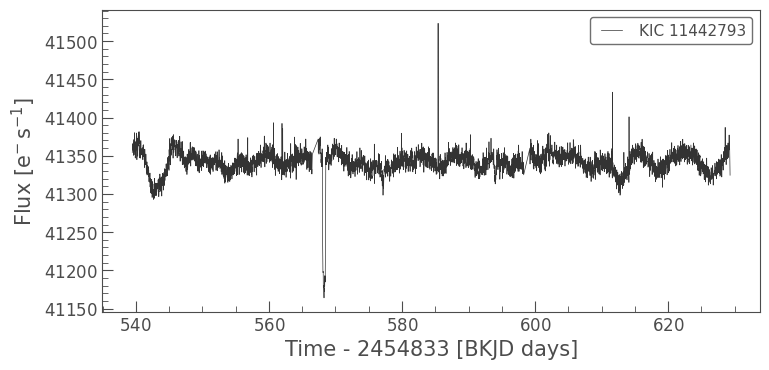

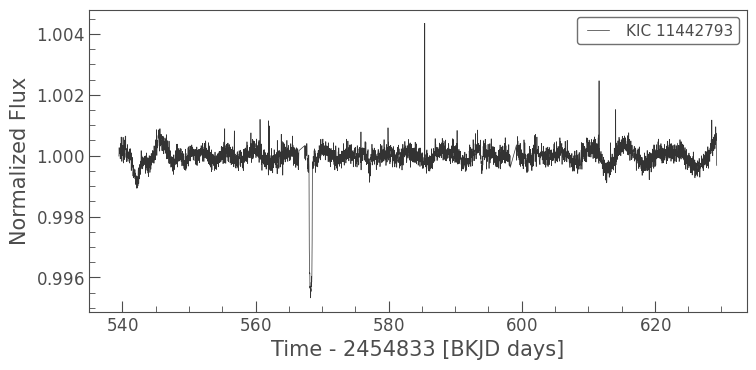

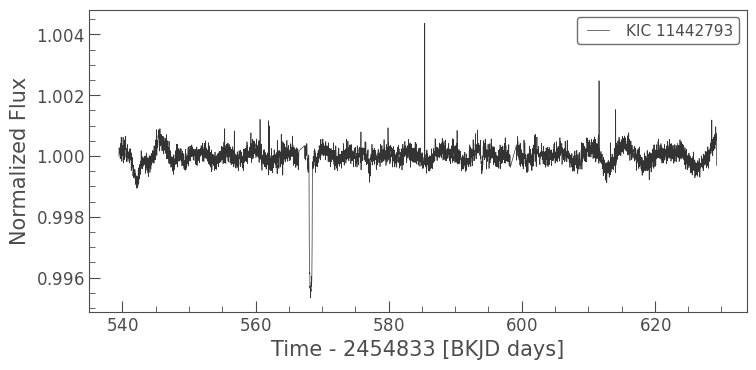

In [22]:
flux_curve('Rishi_2')

In [68]:
Rishi1=lk.read(f'/content/drive/MyDrive/Rishi_1.fits')
Rishi1=Rishi1.normalize()
Rishi2=lk.read(f'/content/drive/MyDrive/Rishi_2.fits')
Rishi2=Rishi2.normalize()
Rishi3=Rishi1.append(Rishi2) #merge 2 fits files

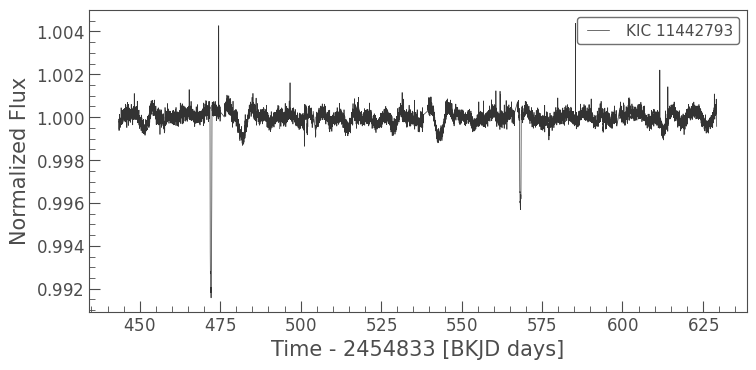

In [69]:
Rishi3.plot()

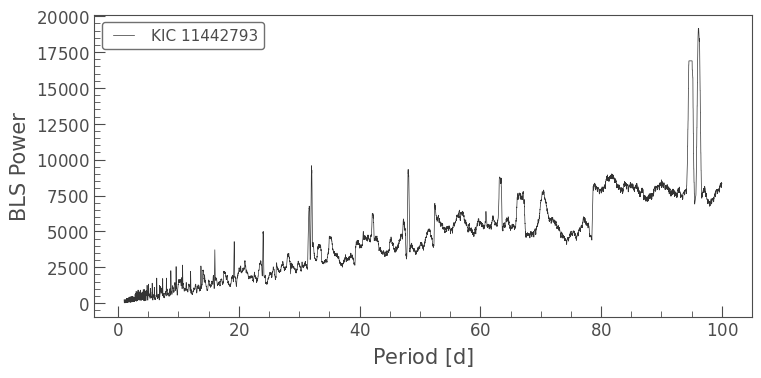

In [80]:
time_period = np.linspace(1, 100, 10000)
bls = Rishi3.to_periodogram(method='bls', period=time_period, frequency_factor=100)
bls.plot()

In [82]:
print("time period for exoplanet of Rishi star is",bls.period_at_max_power)

time period for exoplanet of Rishi star is 96.15841584158417 d


#### **Results for time period**

1.   Ankur       3.524d
2.   Arush       6.873d
3.   Rachna      3.247d
4.   Kushagra    20.752d
5.   Rishi       96.158d



## Distance between host star and exoplanet

**Using Kepler's 3rd law**

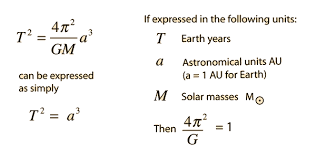

In [84]:
#Masses of stars as given:
# Ankur - 1.213
# Arush - 1.48
# Rishi - 1.2
# Rachna - 1.12
# Khushagra - 1

In [104]:
mass=[1.213,1.48,1.2,1.12,1] #This is a list of masses given to us 
t=[3.524,6.873,96.158,3.247,20.752] #This is list of time periods obtained in the same order as we took masses of stars
ans=[]

In [105]:
for i,j in zip(mass,t): 
  a3=((j**2)*G*i)/(4*365*365*(pi**2)) #applying kepler's 3rd law
  a=a3**(1/3)
  ans.append(a)
  
print(ans)

[<Quantity 5.76055445e-06 m / (kg(1/3) s(2/3))>, <Quantity 9.6088531e-06 m / (kg(1/3) s(2/3))>, <Quantity 5.20240449e-05 m / (kg(1/3) s(2/3))>, <Quantity 5.31146453e-06 m / (kg(1/3) s(2/3))>, <Quantity 1.76140838e-05 m / (kg(1/3) s(2/3))>]
